In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels import api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Индекс NIFTY (NIFTY Index)

In [68]:
indexes = pd.read_excel('data.xlsx', sheet_name='static')
indexes = indexes.set_index("Dates")
nifty = indexes["NIFTY Index"]
nifty.describe()

count     8352.000000
mean      5892.929474
std       5953.261343
min        279.020000
25%       1123.800000
50%       4197.075000
75%       8565.137500
max      26216.050000
Name: NIFTY Index, dtype: float64

In [69]:
nifty.resample("YE").last().pct_change(fill_method=None).describe()

count    35.000000
mean      0.166527
std       0.291234
min      -0.517944
25%       0.009877
50%       0.133984
75%       0.338348
max       0.757616
Name: NIFTY Index, dtype: float64

<Axes: xlabel='Dates'>

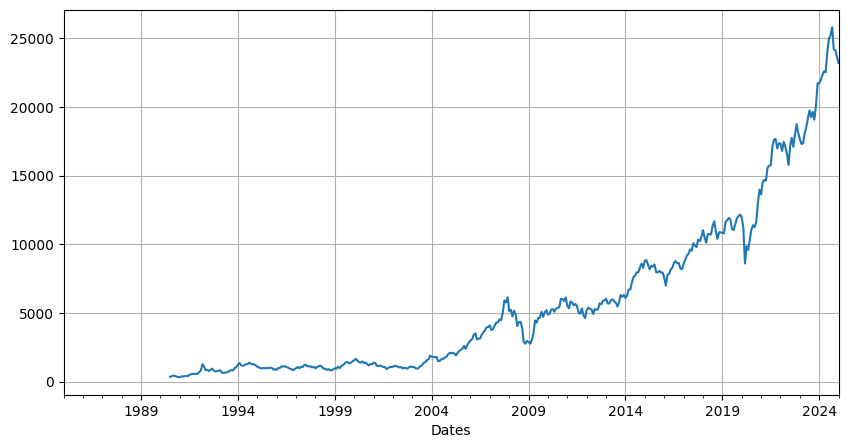

In [70]:
nifty.resample("ME").last().plot(figsize=(10, 5), grid=1)

In [71]:
macro = pd.read_excel('Macro econ inputs.xlsx', sheet_name='India')
macro = macro.set_index("Dates")
macro.index = pd.to_datetime(macro.index)

rename_dict = {
    'INRPYLDP Index': 'Policy Rate',
    'GTINR2Y Govt': '2Y',
    'GTINR10Y Govt': '10Y',
    'INFUTOTY Index': 'Inflation',
    'INPIINDY Index': 'Indu',
    'IGQREGDY Index': 'GDP',
    'IDURTOTM Index': 'Urate',
    'EHBBIN Index': 'Budget balance',
    'ECOYBINN Index': 'Trade Balance',
    'ECOXINN Index': 'Nominal GDP'
}
macro.rename(columns=rename_dict, inplace=True)
macro.describe()

,Policy Rate,2Y,10Y,Inflation,Indu,GDP,Urate,Budget balance,Trade Balance,Nominal GDP
count,89.000000,104.000000,108.000000,56.000000,115.000000,54.000000,30.000000,55.000000,124.000000,55.000000
mean,6.337079,6.926990,7.600213,5.560714,5.253043,6.290000,7.195667,-5.004545,-103.416935,2668.587091
std,1.292186,1.552524,1.422734,2.301063,5.611209,5.345886,1.484798,1.273779,86.674250,675.039114
min,4.000000,3.873000,5.130000,1.330000,-18.700000,-23.130000,4.120000,-9.170000,-302.900000,1777.060000
25%,5.500000,5.803000,6.684250,4.280000,2.550000,5.350000,6.440000,-6.045000,-159.650000,2068.255000
50%,6.500000,6.865500,7.449000,5.325000,4.800000,6.520000,7.355000,-4.770000,-106.950000,2650.670000
75%,7.500000,7.787250,8.030500,6.815000,8.050000,8.180000,8.202500,-3.920000,-9.675000,3235.170000
max,9.000000,11.114000,12.231000,10.500000,24.200000,22.630000,10.180000,-3.280000,-1.900000,4003.340000


### 1й вариант

In [72]:
macro1 = macro[["Policy Rate", "2Y", "10Y", "Indu", "Trade Balance"]]
macro1 = macro1.dropna()
macro1["Policy Rate"] = macro1["Policy Rate"].pct_change()
macro1["Indu"] = macro1["Indu"].pct_change()
macro1 = macro1.dropna()
macro1.describe()

,Policy Rate,2Y,10Y,Indu,Trade Balance
count,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.001723,6.709082,7.295600,-0.744644,-142.200000
std,0.091131,1.180410,0.830867,5.740930,73.844204
min,-0.323529,3.873000,5.243000,-47.750000,-302.900000
25%,-0.038462,5.804000,6.673000,-0.570248,-183.300000
50%,0.000000,6.852000,7.396000,-0.069767,-131.800000
75%,0.040000,7.673000,7.902000,0.500000,-97.500000
max,0.307692,9.228000,8.823000,10.000000,-6.100000


In [73]:
nifty = nifty.resample("QE").last().pct_change().dropna()
nifty

Dates
1990-12-31   -0.247567
1991-03-31    0.107568
1991-06-30    0.069614
1991-09-30    0.412874
1991-12-31    0.008740
                ...   
2024-03-31    0.027403
2024-06-30    0.075411
2024-09-30    0.074977
2024-12-31   -0.083920
2025-03-31   -0.018585
Freq: QE-DEC, Name: NIFTY Index, Length: 138, dtype: float64

In [74]:
merged_data = pd.merge(macro1, nifty, on='Dates', how='inner').dropna()
X = merged_data[["Policy Rate", "2Y", "10Y", "Indu", "Trade Balance"]]
y = merged_data['NIFTY Index']
X = sm.add_constant(X)

In [75]:
merged_data

,Policy Rate,2Y,10Y,Indu,Trade Balance,NIFTY Index
Dates,,,,,,
2001-12-31,0.307692,7.351,7.939,0.153846,-7.3,0.158888
2002-06-30,-0.323529,6.469,7.458,0.500000,-6.1,-0.063521
2002-12-31,-0.043478,5.592,6.068,0.377778,-7.5,0.135337
2003-03-31,-0.090909,5.711,6.147,-0.048387,-9.4,-0.105441
2003-09-30,-0.100000,4.632,5.243,0.271186,-13.2,0.249482
...,...,...,...,...,...,...
2024-03-31,0.000000,7.025,7.053,0.250000,-242.8,0.027403
2024-06-30,0.000000,6.976,7.006,-0.109091,-248.8,0.075411
2024-09-30,0.000000,6.646,6.716,-0.346939,-269.1,0.074977


In [76]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NIFTY Index   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     4.584
Date:                Sun, 01 Feb 2026   Prob (F-statistic):            0.00104
Time:                        19:56:53   Log-Likelihood:                 75.701
No. Observations:                  82   AIC:                            -139.4
Df Residuals:                      76   BIC:                            -125.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1435      0.125      1.144      0.256      -0.106       0.393
Policy Rate       0.2090      0.133      1.566      0.122      -0.057       0.475
2Y               -0.0424      0.022     -1.965      0.053      -0.085       0.001
10Y               0.0301      0.032      0.954      0.343      -0.033       0.093
Indu              0.0053      0.002      2.728      0.008       0.001       0.009
Trade Balance     0.0002      0.000      1.513      0.134   -7.89e-05       0.001
==============================================================================
Omnibus:                        4.469   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                5.719
Skew:                           0.020   Prob(JB):                       0.0573
Kurtosis:                       4.293   Cond. No.                     2.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2й вариант

In [77]:
macro2 = macro[["Policy Rate", "2Y", "10Y", "Indu", "Trade Balance", "Inflation", "GDP", "Budget balance"]]
macro2 = macro2.dropna()
macro2["Policy Rate"] = macro2["Policy Rate"].pct_change()
macro2["Indu"] = macro1["Indu"].pct_change()
macro2 = macro2.dropna()
macro2.describe()

,Policy Rate,2Y,10Y,Indu,Trade Balance,Inflation,GDP,Budget balance
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,-0.005620,6.608922,7.161373,0.447577,-176.017647,5.308235,6.312157,-4.938235
std,0.060130,1.193721,0.776009,7.421523,59.978682,1.978856,5.496091,1.299056
min,-0.145631,3.873000,5.867000,-12.384615,-290.400000,1.440000,-23.130000,-9.170000
25%,-0.037749,6.007000,6.575500,-1.934454,-232.500000,4.280000,5.435000,-6.070000
50%,0.000000,6.778000,7.185000,-0.997648,-159.000000,5.220000,6.530000,-4.640000
75%,0.000000,7.432000,7.563000,0.422500,-130.750000,6.035000,8.290000,-3.885000
max,0.225000,8.621000,8.823000,42.930000,-93.900000,10.500000,22.630000,-3.280000


In [79]:
merged_data = pd.merge(macro2, nifty, on='Dates', how='inner').dropna()
X = merged_data[["Policy Rate", "2Y", "10Y", "Indu", "Trade Balance", "Inflation", "GDP", "Budget balance"]]
y = merged_data['NIFTY Index']
X = sm.add_constant(X)

In [81]:
merged_data

,Policy Rate,2Y,10Y,Indu,Trade Balance,Inflation,GDP,Budget balance,NIFTY Index
Dates,,,,,,,,,
2013-03-31,-0.062500,7.729,7.958,7.696970,-189.6,9.44,4.30,-4.93,-0.037688
2013-06-30,-0.033333,7.573,7.459,-0.811847,-194.7,9.52,6.45,-5.51,0.028095
2013-09-30,0.034483,8.621,8.758,5.066667,-175.2,10.50,7.34,-5.37,-0.018298
2013-12-31,0.033333,8.420,8.823,-0.937783,-150.6,9.46,6.53,-5.52,0.099158
2014-03-31,0.032258,8.438,8.802,-0.646753,-135.8,8.25,5.34,-4.48,0.063484
2014-06-30,0.000000,8.260,8.747,-11.862069,-121.6,6.77,8.02,-4.64,0.135311
2014-09-30,0.000000,8.371,8.513,-1.258813,-131.8,5.63,8.70,-4.43,0.046437
2014-12-31,0.000000,7.910,7.855,-0.855233,-140.4,4.28,5.92,-4.25,0.039913
2015-03-31,-0.062500,7.815,7.736,4.733333,-137.7,5.25,7.11,-4.10,0.025149


In [80]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NIFTY Index   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     6.875
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           1.17e-05
Time:                        19:57:38   Log-Likelihood:                 75.011
No. Observations:                  49   AIC:                            -132.0
Df Residuals:                      40   BIC:                            -115.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1199      0.143      0.838      0.407      -0.169       0.409
Policy Rate        0.0315      0.187      0.169      0.867      -0.346       0.409
2Y                -0.0029      0.021     -0.136      0.893      -0.046       0.040
10Y               -0.0063      0.033     -0.194      0.847      -0.072       0.059
Indu              -0.0077      0.001     -5.945      0.000      -0.010      -0.005
Trade Balance      0.0004      0.000      2.057      0.046    6.54e-06       0.001
Inflation          0.0010      0.006      0.155      0.878      -0.012       0.014
GDP               -0.0040      0.002     -2.305      0.026      -0.007      -0.000
Budget balance    -0.0133      0.010     -1.298      0.202      -0.034       0.007
==============================================================================
Omnibus:                        0.759   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.766
Skew:                          -0.051   Prob(JB):                        0.682
Kurtosis:                       2.396   Cond. No.                     4.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""